In [44]:
# AndroidWorld 轨迹可视化

# 这个 notebook 用于可视化 `runs/diy_0123_v2_split2` 下的轨迹：

# - 展示 **Goal(指令)** + **整条轨迹**
# - 每个 step：展示 `screenshot_step{n}.png`，并 `print` 对应的 `model_response`（即 `result.json` 里的 `trajectory[n].response`）
# - 若该 step 的 tool call 是 `click` 或 `long_press`，在截图上用 **红色圆圈** 标注点击点


from __future__ import annotations

from pathlib import Path
import json
import re

from PIL import Image, ImageDraw
from IPython.display import display, Markdown

RUNS_DIR = Path("/Users/chengkanzhi/Desktop/ScaleCUA/evaluation/AndroidWorld/runs/diy_0123_v2_split2")

_TOOL_RE = re.compile(r"<tool_call>\s*(\{.*?\})\s*</tool_call>", re.DOTALL)


def _extract_click_actions(response_text: str):
    """从 response 里抽取 click/long_press。

    注意：AndroidWorld 的坐标是归一化到 [0, 1000] 的。
    """

    actions = []
    for m in _TOOL_RE.finditer(response_text or ""):
        try:
            call = json.loads(m.group(1))
        except Exception:
            continue

        args = (call or {}).get("arguments") or {}
        action = args.get("action")
        if action not in {"click", "long_press"}:
            continue

        coord = args.get("coordinate")
        if isinstance(coord, (list, tuple)) and len(coord) == 2:
            # 坐标归一化到 0-1000
            actions.append({"action": action, "x_norm": float(coord[0]), "y_norm": float(coord[1])})

    return actions


def _annotate_clicks(img: Image.Image, actions):
    if not actions:
        return img

    img = img.convert("RGBA")
    draw = ImageDraw.Draw(img)
    w, h = img.size
    r = max(10, int(min(w, h) * 0.03))
    stroke = max(3, r // 4)

    for a in actions:
        x = int(round(a["x_norm"] / 1000.0 * w))
        y = int(round(a["y_norm"] / 1000.0 * h))
        draw.ellipse((x - r, y - r, x + r, y + r), outline=(255, 0, 0, 255), width=stroke)

    return img


def _resize_for_display(img: Image.Image, scale: float = 0.2) -> Image.Image:
    if scale >= 1:
        return img
    w, h = img.size
    nw, nh = max(1, int(w * scale)), max(1, int(h * scale))
    resample = getattr(Image, "Resampling", Image).LANCZOS
    return img.resize((nw, nh), resample)


def show_trajectory(traj_dir: Path, max_steps: int | None = None, display_scale: float = 0.2):
    """展示某条轨迹：每步截图 + response，并对 click/long_press 标注红圈。

    display_scale: 显示缩放比例（默认 1/5）。
    """

    data = json.loads((traj_dir / "result.json").read_text(encoding="utf-8"))
    goal = data.get("goal", "")
    display(Markdown(f"## {traj_dir.name}\n\n**Goal**: {goal}"))

    traj = data.get("trajectory") or []
    if max_steps is not None:
        traj = traj[: max_steps]

    for item in traj:
        step = item.get("step")
        response = item.get("response", "")
        actions = _extract_click_actions(response)

        display(Markdown(f"### Step {step}"))

        img_path = None
        for p in sorted(traj_dir.glob(f"screenshot_step{step}.*")):
            img_path = p
            break

        if img_path and img_path.exists():
            img = Image.open(img_path)
            img = _annotate_clicks(img, actions)
            display(_resize_for_display(img, display_scale))
        else:
            print(f"[缺少截图] step={step}")

        print(response)
        print("-" * 80)


Total trajs: 215


## 85_SystemBrightnessMin

**Goal**: Navigate to the Classical Harmonies ringtone list and answer how many sounds are available in that category. Answer the question with a single number.

### Step 0

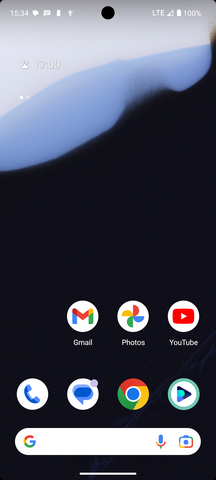

<thinking>
I am on the home screen. I need to find the Settings app to access ringtone settings. I will swipe up to open the app drawer.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "swipe", "coordinate": [500, 800], "coordinate2": [500, 200]}}
</tool_call>
--------------------------------------------------------------------------------


### Step 1

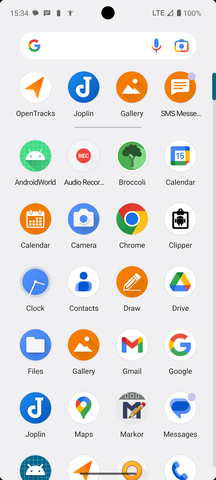

<thinking>
I am currently in the app drawer. I need to find the "Settings" app to access ringtone settings. Since "Settings" is not visible in the current view, I will scroll down to look for it.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "swipe", "coordinate": [500, 800], "coordinate2": [500, 200]}}
</tool_call>
--------------------------------------------------------------------------------


### Step 2

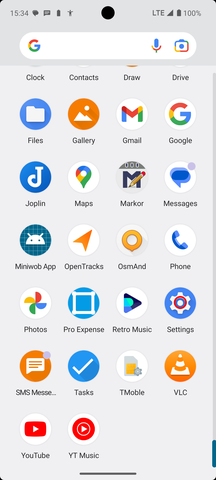

<thinking>
I have located the "Settings" app in the app drawer. It is the blue gear icon in the fourth row of the app grid, on the far right. I will click on it to open the Settings menu.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "click", "coordinate": [834, 630]}}
</tool_call>
--------------------------------------------------------------------------------


### Step 3

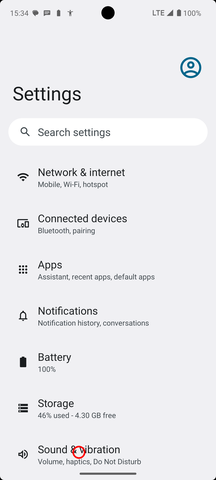

<thinking>
I have successfully opened the Settings menu. Now I need to find the sound settings to access ringtones. I see "Sound & vibration" at the bottom of the screen, which is the correct option. I will click on it.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "click", "coordinate": [365, 942]}}
</tool_call>
--------------------------------------------------------------------------------


### Step 4

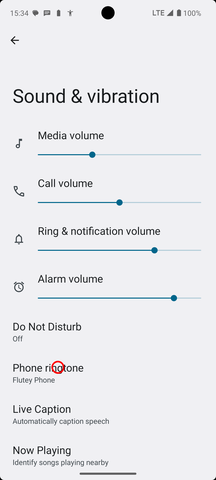

<thinking>
I am currently in the "Sound & vibration" settings. I need to access the ringtone list to find the "Classical Harmonies" category. I see the "Phone ringtone" option, so I will click on it to proceed.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "click", "coordinate": [268, 765]}}
</tool_call>
--------------------------------------------------------------------------------


### Step 5

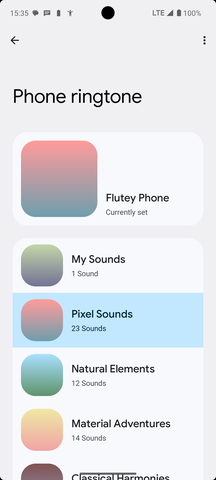

<thinking>
I am currently in the "Phone ringtone" menu. I can see "Classical Harmonies" at the bottom of the list, but the number of sounds is not fully visible. I need to scroll down to see the details for "Classical Harmonies" to answer the user's question.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "swipe", "coordinate": [500, 800], "coordinate2": [500, 400]}}
</tool_call>
--------------------------------------------------------------------------------


### Step 6

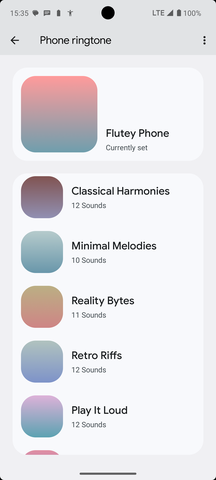

<thinking>
I have successfully navigated to the "Phone ringtone" menu and scrolled down to locate the "Classical Harmonies" category. The screen clearly displays "12 Sounds" under the "Classical Harmonies" title. I have found the information requested by the user.
</thinking>
<tool_call>
{"name": "mobile_use", "arguments": {"action": "terminate", "status": "success", "answer": "12"}}
</tool_call>
--------------------------------------------------------------------------------


PosixPath('/Users/chengkanzhi/Desktop/ScaleCUA/evaluation/AndroidWorld/runs/diy_0123_v2_split2/85_SystemBrightnessMin')

In [66]:
import random


def list_trajectories(runs_dir: Path = RUNS_DIR):
    return sorted([p for p in runs_dir.iterdir() if p.is_dir() and (p / "result.json").exists()])


def show_random_trajectory(
    runs_dir: Path = RUNS_DIR,
    max_steps: int | None = None,
    seed: int | None = None,
    display_scale: float = 0.2,
):
    if seed is not None:
        random.seed(seed)

    trajs = list_trajectories(runs_dir)
    print(f"Total trajs: {len(trajs)}")
    if not trajs:
        raise FileNotFoundError(f"未找到轨迹目录：{runs_dir}")

    traj_dir = random.choice(trajs)
    show_trajectory(traj_dir, max_steps=max_steps, display_scale=display_scale)
    return traj_dir


# 每次运行随机抽一条展示（默认缩小到 1/5）
show_random_trajectory()